# 单阈值的图像分割

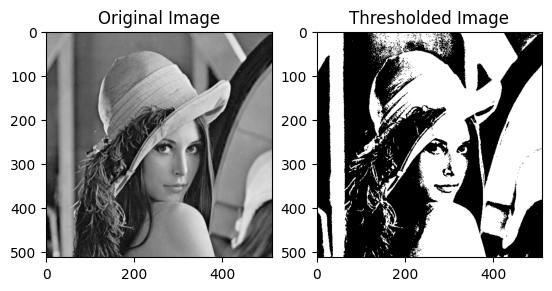

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 使用matplotlib的imread函数读取图像（以灰度模式读取）
image = cv2.imread('9-1.png', 0)

# 显示原始图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# 选择阈值
threshold_value = 127

# 进行单阈值分割
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# 显示分割后的图像
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.show()

# 多阈值分割

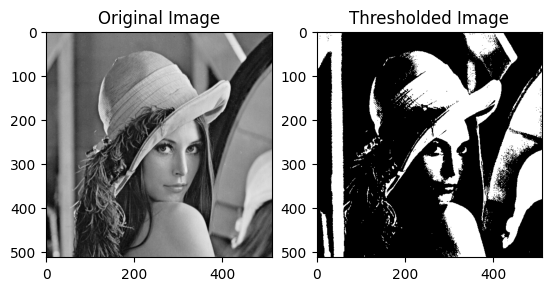

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 使用cv2.imread函数读取图像（以灰度模式读取）
image = cv2.imread('9-1.png', 0)

# 显示原始图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# 选择阈值
threshold_value1 = 100
threshold_value2 = 150

# 进行多阈值分割
_, thresholded_image1 = cv2.threshold(image, threshold_value1, 255, cv2.THRESH_BINARY)
_, thresholded_image2 = cv2.threshold(image, threshold_value2, 255, cv2.THRESH_BINARY)
thresholded_image = cv2.bitwise_and(thresholded_image1, thresholded_image2)

# 显示分割后的图像
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.show()

# 基于一阶导数算子的边缘图像分割

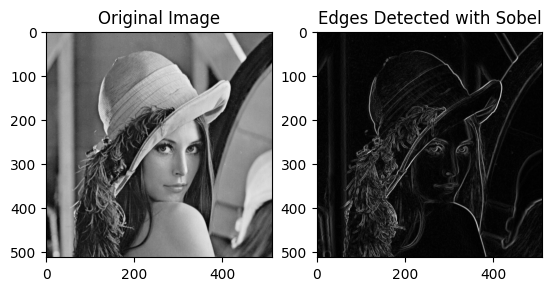

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像（以灰度模式读取）
image = cv2.imread('9-1.png', 0)

# 使用Sobel算子进行边缘检测
# 计算x方向的梯度
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
# 计算y方向的梯度
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# 计算梯度幅值
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# 显示原始图像和边缘检测后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Edges Detected with Sobel')

plt.show()

# 基于二阶导数算子的边缘图像分割

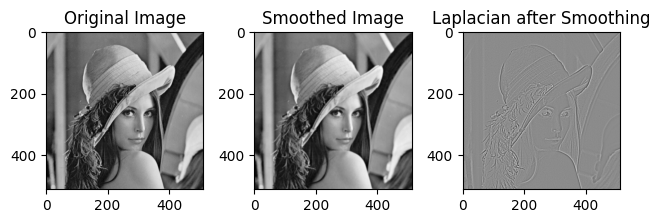

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像（以灰度模式读取）
image = cv2.imread('9-1.png', 0)

# 先进行高斯滤波平滑图像
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# 使用拉普拉斯算子进行边缘检测
laplacian = cv2.Laplacian(image_smoothed, cv2.CV_64F)

# 显示原始图像、平滑后的图像和边缘检测后的图像
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image_smoothed, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(1, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian after Smoothing')
plt.tight_layout()
plt.show()

# 基于区域的图像分割

## 区域生长法

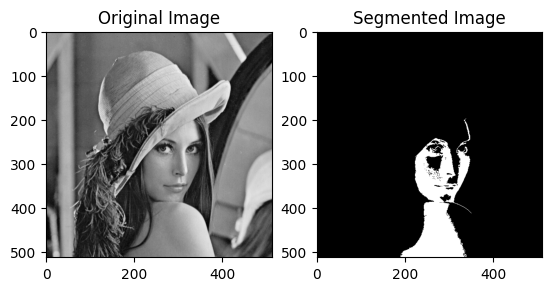

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像（以灰度模式读取）
image = cv2.imread('9-1.png', 0)

# 定义区域生长函数
def region_growing(image, seed_point, threshold):
    height, width = image.shape[:2]
    segmented_image = np.zeros((height, width), dtype=np.uint8)
    visited = np.zeros((height, width), dtype=np.uint8)
    region_mean = 0
    count = 0

    # 计算种子点区域的初始均值
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (seed_point[1] + i >= 0 and seed_point[1] + i < height and
                    seed_point[0] + j >= 0 and seed_point[0] + j < width):
                region_mean += image[seed_point[1] + i, seed_point[0] + j]
                count += 1
    region_mean = region_mean // count

    # 将种子点标记为已访问并添加到区域中
    segmented_image[seed_point[1], seed_point[0]] = 255
    visited[seed_point[1], seed_point[0]] = 1

    # 区域生长过程
    current_points = [seed_point]
    while current_points:
        new_points = []
        for point in current_points:
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if (point[1] + i >= 0 and point[1] + i < height and
                            point[0] + j >= 0 and point[0] + j < width and
                            visited[point[1] + i, point[0] + j] == 0):
                        if abs(image[point[1] + i, point[0] + j] - region_mean) < threshold:
                            segmented_image[point[1] + i, point[0] + j] = 255
                            visited[point[1] + i, point[0] + j] = 1
                            new_points.append((point[0] + j, point[1] + i))
        current_points = new_points

        # 更新区域均值
        region_sum = 0
        region_count = 0
        for i in range(height):
            for j in range(width):
                if segmented_image[i, j] == 255:
                    region_sum += image[i, j]
                    region_count += 1
        region_mean = region_sum // region_count

    return segmented_image

# 选择种子点（
seed_point = (image.shape[1] // 2, image.shape[0] // 2)
# 设置阈值（根据图像特点调整）
threshold = 30

# 进行区域生长分割
segmented_image = region_growing(image, seed_point, threshold)

# 使用plt显示原始图像和分割后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')

plt.show()

## 区域分裂合并法

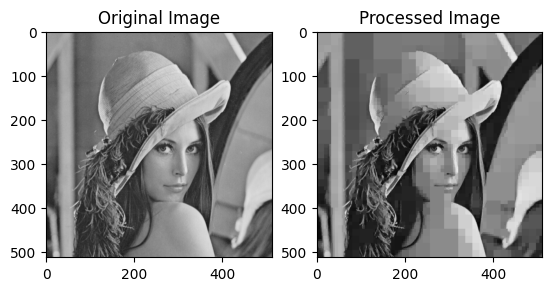

In [6]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
class QuadTree:
    def __init__(self, image, x, y, width, height, threshold):
        self.image = image
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.threshold = threshold
        self.children = []
        self.mean_value = self.calculate_mean()

    def calculate_mean(self):
        region = self.image[self.y:self.y + self.height, self.x:self.x + self.width]
        return np.mean(region)

    def variance(self):
        region = self.image[self.y:self.y + self.height, self.x:self.x + self.width]
        return np.var(region)

    def split(self):
        if self.width <= 1 or self.height <= 1 or self.variance() <= self.threshold:
            return

        half_width = self.width // 2
        half_height = self.height // 2

        self.children.append(QuadTree(self.image, self.x, self.y, half_width, half_height, self.threshold))
        self.children.append(QuadTree(self.image, self.x + half_width, self.y, half_width, half_height, self.threshold))
        self.children.append(QuadTree(self.image, self.x, self.y + half_height, half_width, half_height,
                                      self.threshold))
        self.children.append(QuadTree(self.image, self.x + half_width, self.y + half_height, half_width, half_height,
                                      self.threshold))

        for child in self.children:
            child.split()

    def merge(self, merge_threshold):
        if not self.children:
            return

        to_merge = []
        for child in self.children:
            if abs(child.mean_value - self.mean_value) <= merge_threshold:
                to_merge.append(child)

        if len(to_merge) == len(self.children):
            self.children = []
            self.mean_value = self.calculate_mean()
            self.width *= 2
            self.height *= 2

            for child in to_merge:
                child.merge(merge_threshold)

def process_image(image_path, split_threshold, merge_threshold):
    # 使用cv2读取图像，默认读取为彩色图像，这里为灰度图
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    root = QuadTree(image, 0, 0, image.shape[1], image.shape[0], split_threshold)
    root.split()
    root.merge(merge_threshold)

    return root

image_path = "9-1.png"  # 替换为实际的图像路径
split_threshold = 175  # 可根据需要调整分割阈值
merge_threshold = 15  # 可根据需要调整合并阈值
# 绘制处理前的图片
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # 转换颜色格式以适配plt显示
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

result_tree = process_image(image_path, split_threshold, merge_threshold)

# 生成处理后的图片
processed_image = np.zeros_like(original_image)
def fill_image(image, node):
    if not node.children:
        image[node.y:node.y + node.height, node.x:node.x + node.width] = node.mean_value
        return
    for child in node.children:
        fill_image(image, child)

fill_image(processed_image, result_tree)
processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)  # 转换为灰度图以适配显示
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.show()
#可以看到头发的区域被明显的分割出来

## 聚类分割

C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


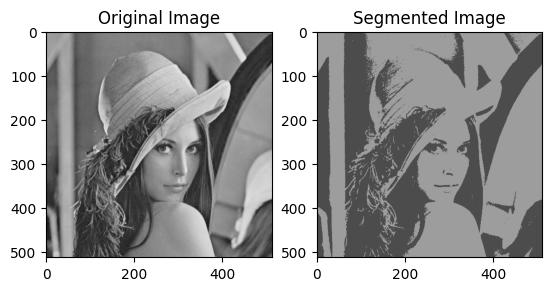

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 读取图像（这里以彩色图像为例，你也可以修改为读取灰度图像）
image = cv2.imread('9-1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 将图像数据重塑为适合聚类算法的格式（二维数组，每行代表一个像素，每列代表一个特征，这里对于彩色图像是RGB三个特征）
pixel_values = image.reshape((-1, 3))

# 转换数据类型为 float32，这是K-Means算法要求的数据类型
pixel_values = np.float32(pixel_values)

# 定义聚类的数量（你可以根据图像特点和需求调整这个值）
num_clusters = 2

# 创建K-Means聚类器并进行聚类
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixel_values)

# 获取聚类后的标签（每个像素所属的聚类类别）
labels = kmeans.labels_

# 根据聚类标签将像素重新分配颜色，以得到分割后的图像
segmented_image = kmeans.cluster_centers_[labels].astype(np.uint8)

# 将分割后的图像重塑为原始图像的形状
segmented_image = segmented_image.reshape(image.shape)

# 使用plt显示原始图像和分割后的图像
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()
#可以看到阴影区域被明显的分割出来